In [9]:
import numpy as np


def life_step_gen_expr(x):
    nbrs_count = sum(np.roll(np.roll(x, i, 0), j, 1)
                     for i in (-1, 0, 1)
                     for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (x & nbrs_count == 2)


def life_step_scipy(x):
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(x, np.ones((3, 3)), mode='same', boundary='wrap')
    return (nbrs_count == 3) | (x & nbrs_count == 2)


life_step = life_step_gen_expr

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt
from matplotlib import animation


def life_animation(x, dpi=10, frames=10, interval=300, mode='loop'):
    x = np.asarray(x)
    assert x.ndim == 2
    x = x.astype(bool)
    
    x_blank = np.zeros_like(x)
    figsize = (x.shape[1] * 1. / dpi, x.shape[0] * 1. / dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(x, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # make background gray
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(x_blank)
        return im,   
    
    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.x)
        animate.x = life_step(animate.x)
        return im,
    
    animate.x = x
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval)  
    return display_animation(anim, default_mode=mode)

C:\Users\admin\PycharmProjects\machinery\venv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  



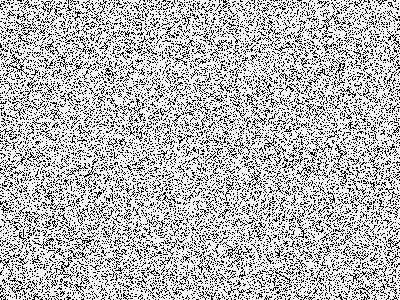
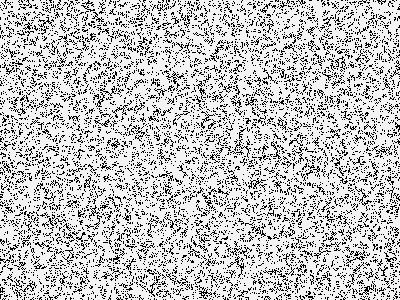
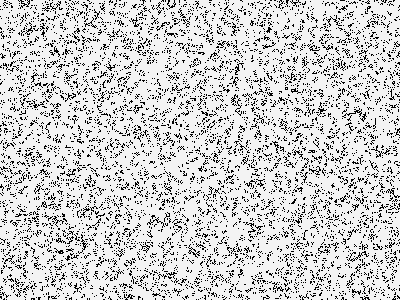
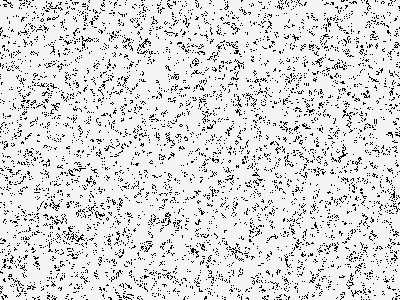
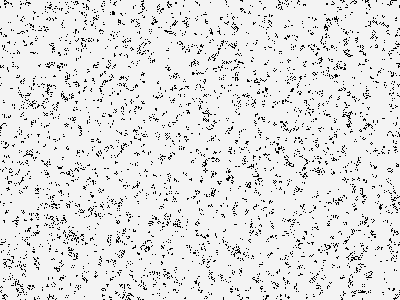
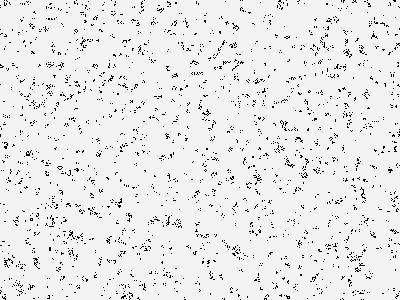
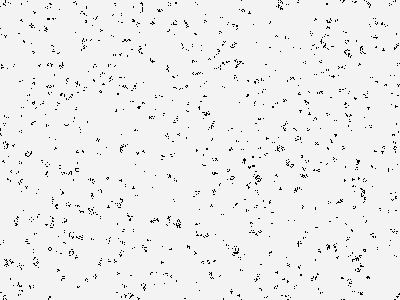
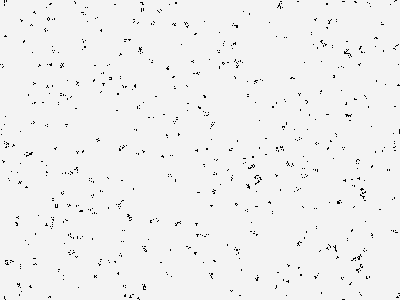
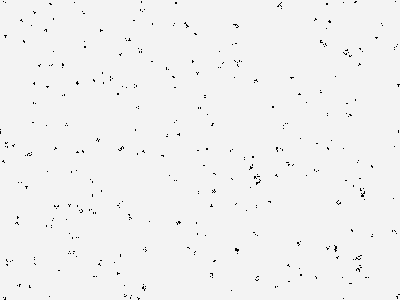
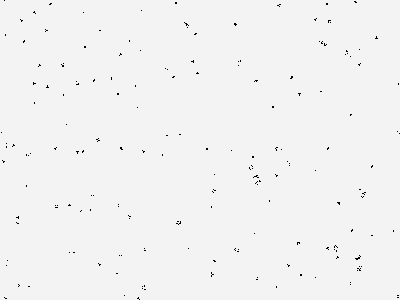
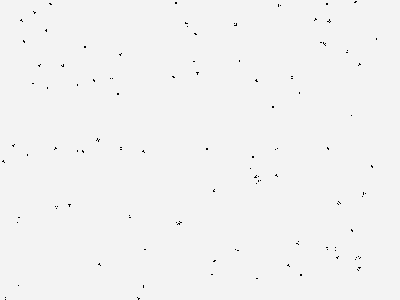
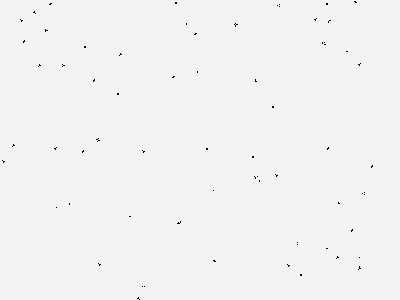
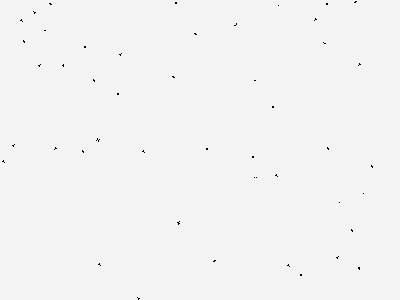
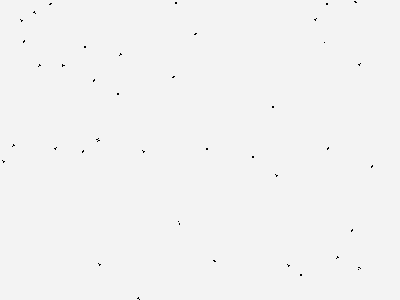
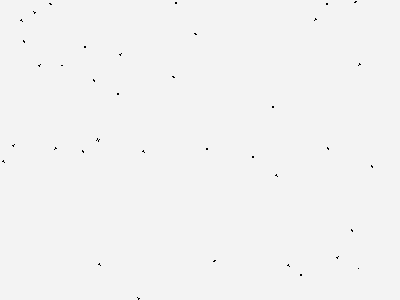
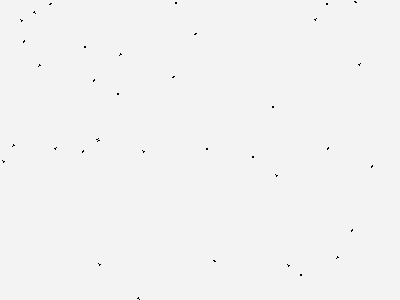
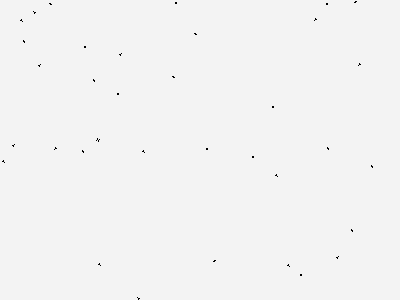
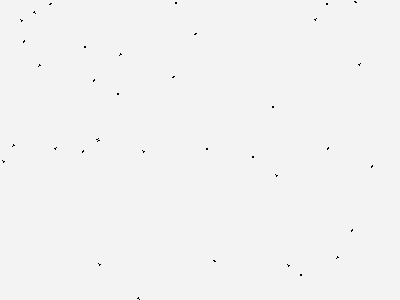
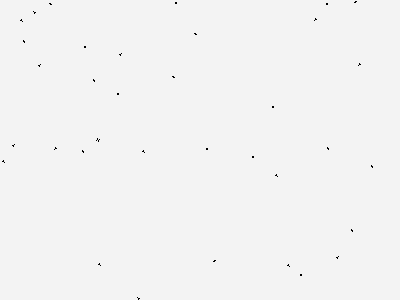
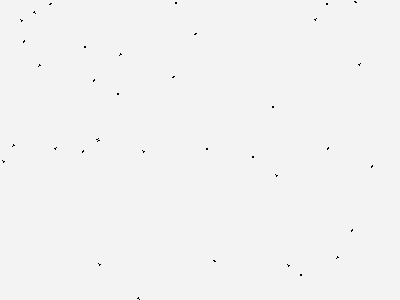

In [12]:
np.random.seed(0)
x = np.zeros((300, 400), dtype=bool)
r = np.random.random((300, 400))
x = (r > 0.75)
life_animation(x, dpi=10, frames=20, mode='once')